In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (1).csv


## ***1. Applying Functions.***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re

In [ ]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')

In [ ]:
print(f"Dataset dimensions: {df.shape}")
print("\nFirst five rows:")
display(df.head())
print("\nLast five rows:")
display(df.tail())

Dataset dimensions: (8807, 12)

First five rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



Last five rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## ***2. Data Cleaning.***

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values[missing_values > 0])


Missing values in each column:
director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


# ***3. Data Types & Conversion.***

---





In [ ]:
print("\nData types:")
print(df.dtypes)


Data types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


# ***4. Univariate Analysis.***

In [ ]:
print("\nCount of Movies vs TV Shows:")
print(df['type'].value_counts())


Count of Movies vs TV Shows:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [ ]:
print("\nTop five most common ratings:")
print(df['rating'].value_counts().head())


Top five most common ratings:
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64


In [ ]:
print("\nMost frequent release year:")
print(df['release_year'].value_counts().head(1))


Most frequent release year:
release_year
2018    1147
Name: count, dtype: int64


# ***5. Duration & Seasons.***

In [ ]:
def parse_duration(duration):
    if pd.isna(duration):
        return np.nan
    if 'Season' in duration or 'Seasons' in duration:
        return int(re.search(r'(\d+)', duration).group(1))
    else:
        return int(re.search(r'(\d+)', duration).group(1))


df['duration_value'] = df['duration'].apply(parse_duration)

In [ ]:
avg_movie_length = df[df['type'] == 'Movie']['duration_value'].mean()
avg_tv_seasons = df[df['type'] == 'TV Show']['duration_value'].mean()
print(f"\nAverage movie length: {avg_movie_length:.2f} minutes")
print(f"Average number of seasons per TV show: {avg_tv_seasons:.2f}")


Average movie length: 99.58 minutes
Average number of seasons per TV show: 1.76


# ***6. Genre Analysis.***

In [ ]:
df['main_genre'] = df['listed_in'].str.split(',').str[0].str.strip()
genre_avg_year = df.groupby('main_genre')['release_year'].mean().sort_values(ascending=False)
print("\nGenres with highest average release year:")
print(genre_avg_year.head())


Genres with highest average release year:
main_genre
TV Horror                       2018.090909
Stand-Up Comedy & Talk Shows    2018.029412
LGBTQ Movies                    2018.000000
Crime TV Shows                  2017.879699
Docuseries                      2017.805430
Name: release_year, dtype: float64


# ***7. Temporal Trends.***

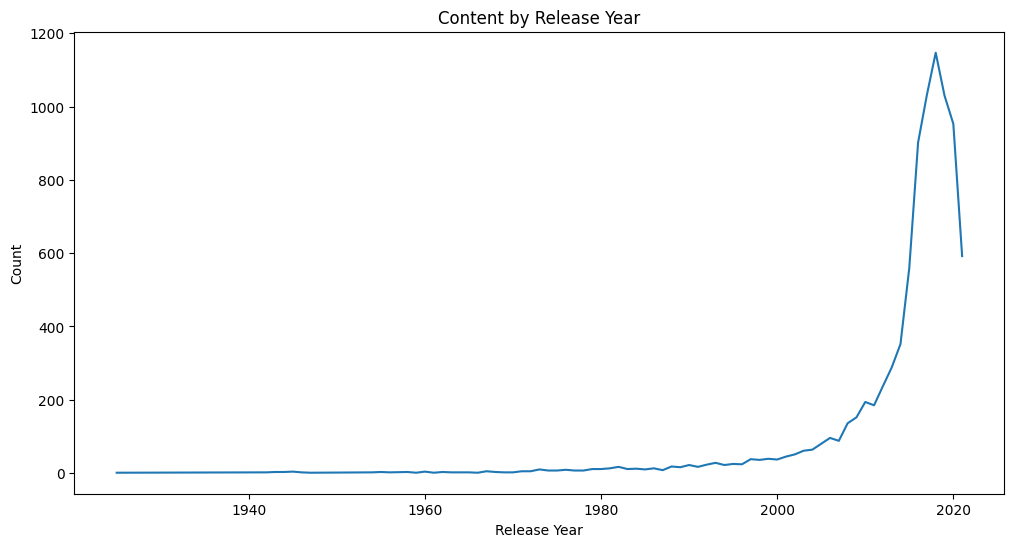

In [ ]:
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot()
plt.title('Content by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['acquisition_time'] = df['year_added'] - df['release_year']
mean_time = df['acquisition_time'].dropna().mean()

print("\nAverage acquisition time (years):")
print(round(mean_time, 2))


Average acquisition time (years):
4.69


# ***8. Rating vs. Type.***

In [ ]:
rating_type_crosstab = pd.crosstab(df['rating'], df['type'], normalize='index')
print("\nRating vs Type (proportions):")
print(rating_type_crosstab)


Rating vs Type (proportions):
type         Movie   TV Show
rating                      
66 min    1.000000  0.000000
74 min    1.000000  0.000000
84 min    1.000000  0.000000
G         1.000000  0.000000
NC-17     1.000000  0.000000
NR        0.937500  0.062500
PG        1.000000  0.000000
PG-13     1.000000  0.000000
R         0.997497  0.002503
TV-14     0.660648  0.339352
TV-G      0.572727  0.427273
TV-MA     0.642969  0.357031
TV-PG     0.625724  0.374276
TV-Y      0.426710  0.573290
TV-Y7     0.416168  0.583832
TV-Y7-FV  0.833333  0.166667
UR        1.000000  0.000000


# ***9. Filtering & Querying.***

In [ ]:
r_rated_recent = df[(df['rating'] == 'R') & (df['year_added'] > 2020)]
print(f"\nNumber of R-rated titles added after 2020: {len(r_rated_recent)}")


Number of R-rated titles added after 2020: 190


# ***10. Aggregations & GroupBy.***

In [ ]:
df_countries = df.copy()
df_countries['country'] = df_countries['country'].str.split(',')
df_countries = df_countries.explode('country')
df_countries['country'] = df_countries['country'].str.strip()

In [ ]:
country_avg_year = df_countries.groupby('country')['release_year'].mean().sort_values(ascending=False)
print("\nAverage release year by country (top 5):")
print(country_avg_year.head())


Average release year by country (top 5):
country
Angola            2020.0
Cameroon          2020.0
Mauritius         2020.0
Cayman Islands    2019.5
Palestine         2019.0
Name: release_year, dtype: float64


In [ ]:
type_by_year = pd.crosstab(df['year_added'], df['type'], normalize='index')
print("\nProportion of Movies vs TV Shows by year added:")
print(type_by_year)


Proportion of Movies vs TV Shows by year added:
type           Movie   TV Show
year_added                    
2008.0      0.500000  0.500000
2009.0      1.000000  0.000000
2010.0      1.000000  0.000000
2011.0      1.000000  0.000000
2012.0      1.000000  0.000000
2013.0      0.600000  0.400000
2014.0      0.826087  0.173913
2015.0      0.767123  0.232877
2016.0      0.605263  0.394737
2017.0      0.720790  0.279210
2018.0      0.761231  0.238769
2019.0      0.712356  0.287644
2020.0      0.683706  0.316294
2021.0      0.662884  0.337116


# ***11. Applying Functions.***

In [ ]:
def get_titles_by_director(director_name):
    if director_name in df['director'].values:
        director_titles = df[df['director'] == director_name][['title', 'release_year']]
        return director_titles.sort_values('release_year')
    else:
        return "Director not found"

In [ ]:
def plot_top_n_categories(column, n=10, title=None):
    plt.figure(figsize=(12, 6))
    df[column].value_counts().head(n).plot(kind='bar')
    plt.title(title if title else f'Top {n} {column}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
print("\nExample: Titles by a sample director (first in the dataset):")
sample_director = df['director'].dropna().iloc[0]
print(f"Sample director: {sample_director}")
display(get_titles_by_director(sample_director))


Example: Titles by a sample director (first in the dataset):
Sample director: Kirsten Johnson


,title,release_year
0,Dick Johnson Is Dead,2020


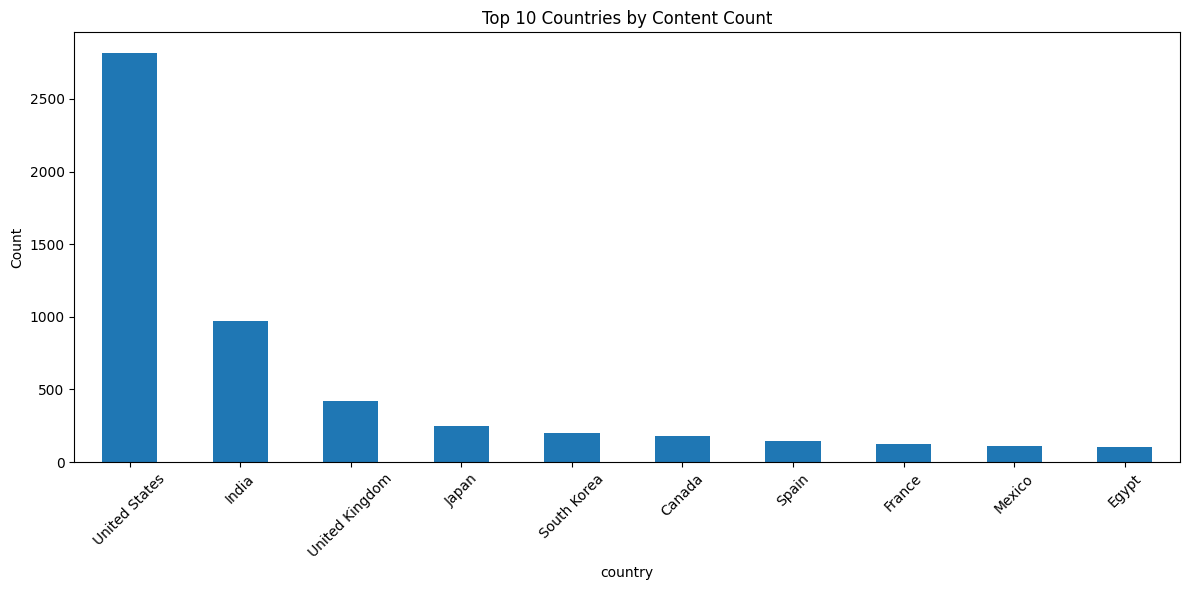

In [ ]:
plot_top_n_categories('country', 10, 'Top 10 Countries by Content Count')